In [1]:
from cProfile import label
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Flatten
from datetime import *
from os import *
from dataprep import *
#path='C:\Users\bensa\OneDrive - Microsoft\Documents\MRPLocal\Data'
path= 'C:\\Users\\bensa\\OneDrive - Microsoft\\Documents\\MRPLocal\\Data'

c:\Users\bensa\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Next -- build out table of metrics and the runner
Write the metrics to a CSV for storage
Use an init for the first metric build

Run a few test runs to see what else we need to record.



Experiment Plans

Build out models to compare performance on
Look at hyperparameter tuning
ONce models are adequately baked, then move to A and B below

A Experiment on using different patients inputs and keeping track of metrics
B Experiment on using feature engineering and build out metrics further


Implement Data cleaning from development to the data helper functions
Add in ability to look at a per patient basis
Perhaps start with overall data size, and then with a % set to train v test


In [25]:
## Record the results
Execution_time = []
train_rmse_results = []
test_rmse_results=[]
run_id = []
sample_size=[]
epochs = []
batch_size=[]
optimizer=[]
layers=[]
forecast_distance_perf=[]
prev_readings=[]



In [16]:
## Simple RNN Model
## Initialize
model_name = 'SimpleRNN'
num_layers = 3
epochs_num = 8
batch_size_set = 200
optimizer_set = tf.keras.optimizers.Adam(learning_rate=0.01)
forecast_distance=6
number_readings=6

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=5, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



#SETUP THE STACK
model_rnn = Sequential()
model_rnn.add(SimpleRNN(100, activation='relu', input_shape=(number_readings,1)))
model_rnn.add(Dense(10))
model_rnn.add(Dense(1))
#START THE RUN
print('\nRunning RNN model...')
start = datetime.now()

model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)

## determine why this is pushing out lists instead of an array


Running RNN model...
Epoch 1/8
137/137 [==============================] - 2s 8ms/step - loss: 6.3010 - root_mean_squared_error: 2.5102 - val_loss: 3.7476 - val_root_mean_squared_error: 1.9359
Epoch 2/8
137/137 [==============================] - 1s 6ms/step - loss: 3.3846 - root_mean_squared_error: 1.8397 - val_loss: 3.6951 - val_root_mean_squared_error: 1.9223
Epoch 3/8
137/137 [==============================] - 1s 6ms/step - loss: 3.2716 - root_mean_squared_error: 1.8088 - val_loss: 3.3678 - val_root_mean_squared_error: 1.8352
Epoch 4/8
137/137 [==============================] - 1s 7ms/step - loss: 3.2375 - root_mean_squared_error: 1.7993 - val_loss: 3.4925 - val_root_mean_squared_error: 1.8688
Epoch 5/8
137/137 [==============================] - 1s 7ms/step - loss: 3.2816 - root_mean_squared_error: 1.8115 - val_loss: 3.4565 - val_root_mean_squared_error: 1.8592
Epoch 6/8
137/137 [==============================] - 1s 7ms/step - loss: 3.2926 - root_mean_squared_error: 1.8145 - val_los

In [8]:
## LSTM Model
## Initialize
model_name = 'LSTM'
num_layers = 5
epochs_num = 8
batch_size_set = 200
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=5, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)



#SETUP THE STACK
model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='relu', input_shape=(number_readings, 1),return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(64, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(20, activation='relu'))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1))

#START THE RUN
print('\nRunning LSTM model...')
start = datetime.now()

model_lstm.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_lstm.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_lstm.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_lstm.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)




Running LSTM model...
Epoch 1/8
117/117 [==============================] - 5s 28ms/step - loss: 27.3660 - root_mean_squared_error: 5.2313 - val_loss: 8.3370 - val_root_mean_squared_error: 2.8874
Epoch 2/8
117/117 [==============================] - 3s 29ms/step - loss: 9.1462 - root_mean_squared_error: 3.0243 - val_loss: 11.8232 - val_root_mean_squared_error: 3.4385
Epoch 3/8
117/117 [==============================] - 3s 25ms/step - loss: 7.8722 - root_mean_squared_error: 2.8057 - val_loss: 13.1932 - val_root_mean_squared_error: 3.6322
Epoch 4/8
117/117 [==============================] - 3s 27ms/step - loss: 7.2541 - root_mean_squared_error: 2.6933 - val_loss: 11.6165 - val_root_mean_squared_error: 3.4083
Epoch 5/8
117/117 [==============================] - 6s 48ms/step - loss: 6.9120 - root_mean_squared_error: 2.6291 - val_loss: 17.5996 - val_root_mean_squared_error: 4.1952
Epoch 6/8
117/117 [==============================] - 6s 55ms/step - loss: 6.5278 - root_mean_squared_error: 2.55

In [13]:
## GRU Model
## Initialize
model_name = 'GRU'
num_layers = 2
epochs_num = 8
batch_size_set = 150
optimizer_set = 'adam'
forecast_distance=6
number_readings=8

## Get New Data
a=DataSampling(path=path)
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=5, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


#SETUP THE STACK
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(number_readings,1), return_sequences=True))
model_gru.add(GRU(10, activation='relu'))
model_gru.add(Dense(1))


#START THE RUN
print('\nRunning GRU model...')
start = datetime.now()

model_gru.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_gru.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_gru.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_gru.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)



Running GRU model...
Epoch 1/8
131/131 [==============================] - 3s 11ms/step - loss: 57.2990 - root_mean_squared_error: 7.5696 - val_loss: 4.0269 - val_root_mean_squared_error: 2.0067
Epoch 2/8
131/131 [==============================] - 1s 8ms/step - loss: 4.2647 - root_mean_squared_error: 2.0651 - val_loss: 2.9462 - val_root_mean_squared_error: 1.7164
Epoch 3/8
131/131 [==============================] - 2s 12ms/step - loss: 3.3364 - root_mean_squared_error: 1.8266 - val_loss: 2.7290 - val_root_mean_squared_error: 1.6520
Epoch 4/8
131/131 [==============================] - 2s 15ms/step - loss: 3.0305 - root_mean_squared_error: 1.7408 - val_loss: 2.6461 - val_root_mean_squared_error: 1.6267
Epoch 5/8
131/131 [==============================] - 2s 15ms/step - loss: 2.8756 - root_mean_squared_error: 1.6957 - val_loss: 2.5235 - val_root_mean_squared_error: 1.5885
Epoch 6/8
131/131 [==============================] - 2s 15ms/step - loss: 2.7607 - root_mean_squared_error: 1.6615 - v

In [17]:
metrics_df = pd.DataFrame(list(zip(Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,
prev_readings))
    ,columns=['Execution_time','train_rmse_results','test_rmse_results','run_id','sample_size','epochs','batch_size','optimizer','layers','forecast_distance_perf',
'prev_readings'])

In [18]:
metrics_df

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,49.764249,1.772849,1.806986,SimpleRNN2022-08-02 20:26:20.115776,43348,10,25,adam,3,6,6
1,17.432546,2.154079,2.177157,SimpleRNN2022-08-02 20:29:46.125627,56396,8,100,adam,3,6,6
2,22.061703,2.226013,2.199565,SimpleRNN2022-08-02 20:30:33.928720,57230,8,100,adam,3,6,8
3,193.892447,1.922752,1.997394,LSTM_no_dropouts2022-08-02 20:39:37.247602,93548,8,100,adam,5,6,8
4,42.066980,4.118121,3.940736,LSTM2022-08-02 20:41:31.267803,29078,8,200,adam,5,6,8
5,14.124706,1.505760,1.508259,SimpleRNN2022-08-02 20:43:19.821435,37827,8,100,adam,3,6,6
6,10.352220,1.372852,1.551320,GRU2022-08-02 20:51:37.026524,29998,8,200,adam,1,6,6
7,33.261215,1.844089,1.749079,GRU2022-08-02 20:55:58.297397,59767,8,150,adam,2,6,6
8,19.094563,1.613799,1.644618,GRU2022-08-02 20:56:40.335735,24552,8,150,adam,2,6,8
9,11.271150,2.136492,2.182716,SimpleRNN2022-08-02 21:19:27.359945,27768,8,100,<keras.optimizer_v2.adam.Adam object at 0x0000...,3,6,6


In [28]:
all_history = pd.read_csv(metrics_file)
all_history.drop('Unnamed: 0',axis=1,inplace=True)
all_history

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
1,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
2,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8
3,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8
4,49.764249,1.772849,1.806986,SimpleRNN2022-08-02 20:26:20.115776,43348,10,25,adam,3,6,6
5,17.432546,2.154079,2.177157,SimpleRNN2022-08-02 20:29:46.125627,56396,8,100,adam,3,6,6
6,22.061703,2.226013,2.199565,SimpleRNN2022-08-02 20:30:33.928720,57230,8,100,adam,3,6,8
7,193.892447,1.922752,1.997394,LSTM_no_dropouts2022-08-02 20:39:37.247602,93548,8,100,adam,5,6,8
8,42.066980,4.118121,3.940736,LSTM2022-08-02 20:41:31.267803,29078,8,200,adam,5,6,8
9,14.124706,1.505760,1.508259,SimpleRNN2022-08-02 20:43:19.821435,37827,8,100,adam,3,6,6


In [24]:
filename='metrics_full.csv'
metrics_file = os.path.join(path, filename)
## Load all previously generate metrics
all_history = pd.read_csv(metrics_file)
all_history.drop('Unnamed: 0',axis=1,inplace=True)

## Concatenate all metrics
full_metrics=pd.concat([all_history,metrics_df])
full_metrics.to_csv(metrics_file)
## Write complete DF back to original File
#drop recorded results




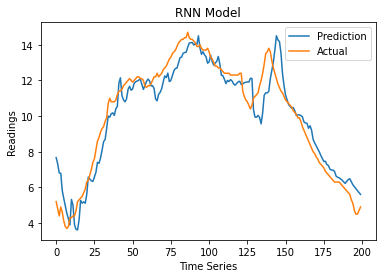

In [38]:

y_pred = model_rnn.predict(X_test)
plt.plot(range(len(y_pred[:200])),y_pred[:200], label='Prediction')
plt.plot(y_test[:200], label='Actual')
plt.xlabel('Time Series')
plt.ylabel('Readings')
plt.title('RNN Model')
plt.legend()
plt.show()

In [15]:
hist_metrics = pd.read_csv(metrics_file)
hist_metrics.drop('Unnamed: 0',axis=1,inplace=True)
hist_metrics


,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.70473,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8


In [18]:
hist_metrics

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.70473,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8


In [16]:
metrics_df

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
1,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8
2,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8


In [24]:
filename='metrics_full.csv'
metrics_file2 = os.path.join(path, filename)
metrics_check = pd.read_csv(metrics_file2)
metrics_check

,Unnamed: 0,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
1,0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
2,1,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8
3,2,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8


In [20]:

filename='metrics_full.csv'
metrics_file2 = os.path.join(path, filename)
full_metrics=pd.concat([hist_metrics,metrics_df])
#full_metrics
## Write back to file
full_metrics.to_csv(metrics_file2)


In [20]:

print (run_id)

['SimpleRNN2022-07-28 21:17:30.781490']


In [ ]:

def root_mean_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.math.squared_difference(y_true, y_pred)))


class RunModel:

    def __init__(self,X_train, X_test, y_train, y_test):
        #self.X_train = (tf.convert_to_tensor(X_train) - tf.math.reduce_min(tf.convert_to_tensor(X_train))) / (tf.math.reduce_max(tf.convert_to_tensor(X_train)) - tf.math.reduce_min(tf.convert_to_tensor(X_train)))
        #self.y_train = (tf.convert_to_tensor(y_train) - tf.math.reduce_min(tf.convert_to_tensor(y_train))) / (tf.math.reduce_max(tf.convert_to_tensor(y_train)) - tf.math.reduce_min(tf.convert_to_tensor(y_train)))
        #self.X_test = (tf.convert_to_tensor(X_test) - tf.math.reduce_min(tf.convert_to_tensor(X_test))) / (tf.math.reduce_max(tf.convert_to_tensor(X_test)) - tf.math.reduce_min(tf.convert_to_tensor(X_test)))
        #self.y_test = (tf.convert_to_tensor(y_test) - tf.math.reduce_min(tf.convert_to_tensor(y_test))) / (tf.math.reduce_max(tf.convert_to_tensor(y_test)) - tf.math.reduce_min(tf.convert_to_tensor(y_test)))
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.X_test = np.array(X_test)
        self.y_test = np.array(y_test)
        self.metric_df = pd.DataFrame()

    def rnn_model(self):
        model_rnn = Sequential()
        model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(8,1)))
        model_rnn.add(Dense(10))
        model_rnn.add(Dense(1))
        print('\nRunning RNN model...')
        model_rnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_rnn.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_rnn.evaluate(self.X_train, self.y_train)
        print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_rnn.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_rnn.predict(self.X_test)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('Simple RNN MODEL')
        plt.legend()
        plt.savefig('Model Fig - SimpleRNN.png')
        plt.clf()
        model_rnn.summary()
        self.metric_df['RNN RMSE'] = hist.history['val_root_mean_squared_error']



    def lstm_model(self):
        model_lstm = Sequential()
        model_lstm.add(LSTM(128, activation='relu', input_shape=(8, 1),return_sequences=True))
        model_lstm.add(Dropout(0.3))
        model_lstm.add(LSTM(64, activation='relu'))
        model_lstm.add(Dropout(0.3))
        model_lstm.add(Dense(20, activation='relu'))
        model_lstm.add(Dense(10, activation='relu'))
        model_lstm.add(Dense(1))
        print('\nRunning the LSTM model...')
        model_lstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_lstm.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_lstm.evaluate(self.X_train, self.y_train)
        print(f'LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_lstm.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_lstm.predict(self.X_test)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('LSTM MODEL')
        plt.legend()
        plt.savefig('Model Fig - LSTM.png')
        plt.clf()
        model_lstm.summary()
        self.metric_df['LSTM RMSE'] = hist.history['val_root_mean_squared_error']


    def gru_model(self):
        model_gru = Sequential()
        model_gru.add(GRU(50, activation='relu', input_shape=(8,1)))
        model_gru.add(Dense(1))
        print('\nRunning GRU model...')
        model_gru.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_gru.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_gru.evaluate(self.X_train, self.y_train)
        print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_gru.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_gru.predict(self.X_test)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('GRU MODEL')
        plt.legend()
        plt.savefig('Model Fig - GRU.png')
        plt.clf()
        model_gru.summary()
        self.metric_df['GRU RMSE'] = hist.history['val_root_mean_squared_error']


    def cnn_lstm_model(self):
        model_cnn_lstm = Sequential()
        model_cnn_lstm.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(8,1)))
        model_cnn_lstm.add(tf.keras.layers.MaxPooling1D((1)))
        model_cnn_lstm.add(LSTM(10, activation='relu', return_sequences=True))
        model_cnn_lstm.add(Flatten())
        model_cnn_lstm.add(Dense(1))
        print('\nRunning the CNN+LSTM model...')
        model_cnn_lstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_cnn_lstm.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_cnn_lstm.evaluate(self.X_train, self.y_train)
        print(f'CNN+LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_cnn_lstm.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_cnn_lstm.predict(self.X_test)
        print(y_pred.shape)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('CNN+LSTM MODEL')
        plt.legend()
        plt.savefig('Model Fig - CNN+LSTM.png')
        plt.clf()
        model_cnn_lstm.summary()
        self.metric_df['CNN+LSTM RMSE'] = hist.history['val_root_mean_squared_error']


    def main(self):
        self.rnn_model()
        self.lstm_model()
        self.gru_model()
        self.cnn_lstm_model()
        self.metric_df.plot(xlabel='Epochs', ylabel='RMSE', legend=True)
        plt.show()


In [6]:


def seriesToTimeSeries(self, X, step_length=8,forecast_dist=6):
    y=[]
    reshapedX = []
    for i in range(len(X)-forecast_dist-step_length):
        y.append(X[i+step_length+forecast_dist])
        reshapedX.append(X[i:i+step_length])
    return reshapedX,y

def shapeSeriesFromDF(df,indexForSelection):
    
    an_X = df[df['series_id']==indexForSelection[0]].ValueMMOL.tolist()
    an_X, y = seriesToTimeSeries(an_X)
    X_=an_X
    y_=y

    for i in indexForSelection[1:]:
        an_X = df[df['series_id']==i].ValueMMOL.tolist()
        an_X, y = seriesToTimeSeries(an_X)
        
        X_ = X_+an_X
        y_ = y_+y
    return X_,y_



def SampleValidSequences(self, num_clients=8, test_split=0.3,seed=1):
    samplingDF = self.samplingDF
    ## cleaning up the data -- Resetting data types
    
    random.seed(seed)
    
    new_df = samplingDF.groupby('series_id').count()
    ct_df = samplingDF.groupby('PtID').count()

    client_list = ct_df.index.to_numpy()
    cl_ind = client_list[random.sample(range(0,len(client_list)),num_clients)] ##clientids to use for the training

    cl_df = samplingDF[samplingDF.PtID.isin(cl_ind)] ## list of all samples relative to these clients

    series_select = cl_df.groupby('series_id').count()
    series_select = series_select.sample(frac=1)
    series_select = series_select.index.to_list()

    index_cut = int((1-test_split) * len(series_select))
    train_index = series_select[0:index_cut]
    test_index=series_select[index_cut:]

    training_df = samplingDF[samplingDF.series_id.isin(train_index)]
    testing_df = samplingDF[samplingDF.series_id.isin(test_index)]

    ## build training dataset
    X_train,y_train = shapeSeriesFromDF(training_df,train_index)
    X_test,y_test = shapeSeriesFromDF(testing_df,test_index)

    return X_train, X_test, y_train, y_test



In [8]:
x,y=shapeSeriesFromDF(a.samplingDF,[1,3,45])  

TypeError: seriesToTimeSeries() missing 1 required positional argument: 'X'